In [1]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

truedata = np.load("3RETransits300ppm_Large.npy", allow_pickle = True)
falsedataA = np.load("falsepositive300a.npy", allow_pickle = True)
falsedata = falsedataA[:1000]
print(len(truedata))
print(len(falsedata))
#falsedataA = np.load("falsepositive300a.npy", allow_pickle = True)
#falsedataB = np.load("falsepositive300b.npy", allow_pickle = True)
#falsedata = np.append(falsedataA, falsedataB)

1000
1000


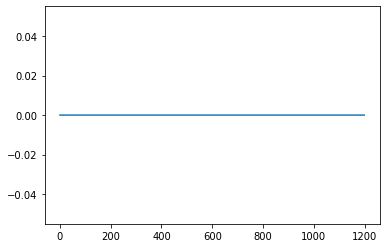

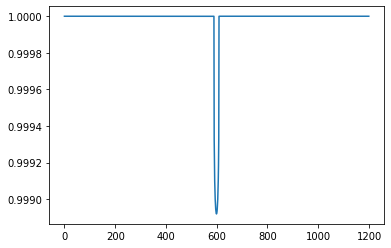

(2000, 1200, 1)
(2000,)


In [2]:
# make categories list
y_false = np.full(len(falsedata),0,dtype = int)
y_true = np.full(len(truedata),1,dtype = int)

y = np.append(y_false,y_true)

folded_flux = falsedata[0].folded_y
false_phasefolds = np.zeros((len(falsedata),len(folded_flux),1))
folded_flux = truedata[0].model_folded_model
true_phasefolds = np.zeros((len(truedata),len(folded_flux),1))

for i, data in enumerate(falsedata):
    #folded_flux = data.folded_y
    folded_flux = np.zeros(len(data.folded_y))
    for j, point in enumerate(folded_flux):
        false_phasefolds[i,j] = folded_flux[j]

plt.plot(folded_flux)
plt.show()

for i, data in enumerate(truedata):
    folded_flux = data.model_folded_model
    for j, point in enumerate(folded_flux):
        true_phasefolds[i,j] = folded_flux[j]

plt.plot(folded_flux)
plt.show()

x = np.concatenate((false_phasefolds, true_phasefolds))
print(x.shape)
print(y.shape)

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X = shuffle(x)
Y = shuffle(y)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3)

In [17]:

"""

# CNN found on https://github.com/pearsonkyle/Exoplanet-Artificial-Intelligence/blob/master/shallue_vanderburg_recreation.py

input_global = Input(shape=x_train.shape[1:])
x = Conv1D(16, 5, strides=1)(input_global)
x = Conv1D(16, 5, strides=1)(x)
x = MaxPool1D(pool_size=5, strides=2)(x)
x = Conv1D(32, 5, strides=1)(x)
x = Conv1D(32, 5, strides=1)(x)
x = MaxPool1D(pool_size=5, strides=2)(x)
x = Conv1D(64, 5, strides=1)(x)
x = Conv1D(64, 5, strides=1)(x)
x = MaxPool1D(pool_size=5, strides=2)(x)
x = Conv1D(128, 5, strides=1)(x)
x = Conv1D(128, 5, strides=1)(x)
x = MaxPool1D(pool_size=5, strides=2)(x)
x = Conv1D(256, 5, strides=1)(x)
x = Conv1D(256, 5, strides=1)(x)
x = MaxPool1D(pool_size=5, strides=2)(x)

xf = Flatten()(x)
z = Dense(512, activation='relu')(xf)
z = Dense(512, activation='relu')(z)
z = Dense(512, activation='relu')(z)

output = Dense(1, activation='sigmoid', name='main_output')(z)
"""

input_global = Input(shape=x_train.shape[1:])
x = Conv1D(16, 5, strides=1)(input_global)
x = Conv1D(32, 5, strides=1)(x)
x = Conv1D(64, 5, strides=1)(x)
x = Conv1D(128, 5, strides=1)(x)
x = Conv1D(256, 5, strides=1)(x)
xf = Flatten()(x)
z = Dense(512, activation='relu')(xf)
output = Dense(1, activation='sigmoid', name='main_output')(z)

model = Model(inputs=input_global, outputs=output)

model.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1200, 1)]         0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1196, 16)          96        
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1192, 32)          2592      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1188, 64)          10304     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1184, 128)         41088     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1180, 256)         164096    
_________________________________________________________________
flatten_2 (Flatten)          (None, 302080)           

In [18]:
from tensorflow.keras.metrics import BinaryAccuracy

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = [BinaryAccuracy(name='acc',threshold = 0.5)])

In [19]:
batch_size = 64
hist = model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/50
22/22 [==============================] - 25s 1s/step - loss: 5.3593 - acc: 0.4900 - val_loss: 1.6233 - val_acc: 0.4767
Epoch 2/50
22/22 [==============================] - 24s 1s/step - loss: 0.9070 - acc: 0.4936 - val_loss: 0.7642 - val_acc: 0.4767
Epoch 3/50
22/22 [==============================] - 24s 1s/step - loss: 0.8533 - acc: 0.4893 - val_loss: 0.7890 - val_acc: 0.4967
Epoch 4/50
22/22 [==============================] - 24s 1s/step - loss: 0.7296 - acc: 0.4793 - val_loss: 0.6931 - val_acc: 0.5233
Epoch 5/50
22/22 [==============================] - 24s 1s/step - loss: 0.7066 - acc: 0.4736 - val_loss: 0.7087 - val_acc: 0.4967
Epoch 6/50
22/22 [==============================] - 24s 1s/step - loss: 0.6995 - acc: 0.5007 - val_loss: 0.7055 - val_acc: 0.5033
Epoch 7/50
22/22 [==============================] - 24s 1s/step - loss: 1.2067 - acc: 0.4657 - val_loss: 0.9776 - val_acc: 0.4967
Epoch 8/50
22/22 [==============================] - 24s 1s/step - loss: 0.8579 - acc: 0.49

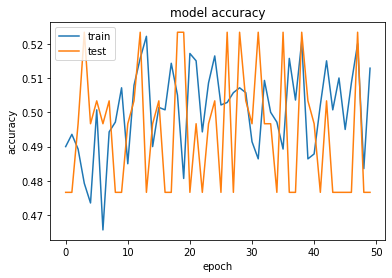

In [20]:
# Plot model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

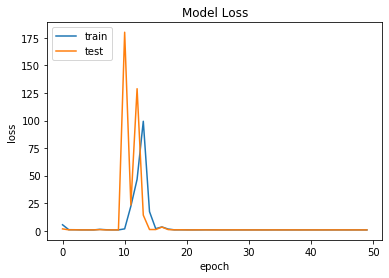

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

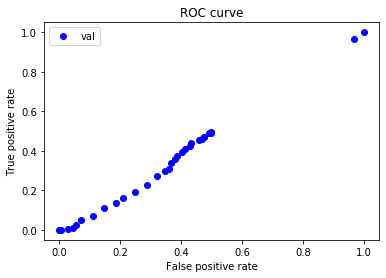

In [22]:
# Plot a "ROC" curve

from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
# plt.plot(fpr, tpr, label='test')

fpr, tpr, thresholds = roc_curve(y_val, model.predict(x_val))
plt.plot(fpr, tpr, "bo", label='val')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.legend()

In [23]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00699301 0.02797203 0.04545455 0.05594406 0.06993007
 0.11188811 0.14685315 0.18531469 0.20979021 0.24825175 0.28671329
 0.32167832 0.34615385 0.36013986 0.36713287 0.38111888 0.38811189
 0.4020979  0.41258741 0.43006993 0.43356643 0.45804196 0.46853147
 0.47552448 0.47552448 0.49300699 0.5        0.5        0.96853147
 1.        ]
[0.         0.         0.00318471 0.00955414 0.02547771 0.0477707
 0.07006369 0.11146497 0.13694268 0.16242038 0.19426752 0.22929936
 0.27388535 0.29936306 0.3089172  0.33757962 0.3566879  0.37261146
 0.39171975 0.41082803 0.42356688 0.43949045 0.45541401 0.45859873
 0.46815287 0.47133758 0.49044586 0.49044586 0.49363057 0.96815287
 1.        ]
[1.4853345  0.48533455 0.48533452 0.4853345  0.48533446 0.48533443
 0.4853344  0.48533437 0.48533434 0.4853343  0.48533428 0.48533425
 0.48533422 0.4853342  0.48533416 0.48533413 0.4853341  0.48533407
 0.48533404 0.485334   0.48533398 0.48533395 0.48533392 0.4853339
 0.48533386 0.48533383 0.4853338  0.48